In [1]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
# Basic lib imports
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import collections
from scipy import stats
import seaborn as sns
import pickle
import seaborn as sns
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage
import math
from scipy.stats import zscore
%matplotlib inline

In [3]:
%store -r labeledCT

In [6]:
#labeledCT

In [7]:
# labeledCT.columns[1:81927]

In [8]:
NUSDASTvsNC = pd.read_csv('mergedData_wOut_duplicates_final_justNUSDAST_andNC.csv')

In [9]:
# NUSDASTvsNC[NUSDASTvsNC['dx']=='No_Known_Disorder']

In [10]:
# labeledCT['Group']

In [11]:
common = NUSDASTvsNC.merge(labeledCT,how='left',on=['subjectid'])

In [12]:
# common[common['dx.1']==1][common['Group']==1]['Group'].shape

In [13]:
NUSDAST_SZ = common[common['dx.1']==1][common['Group']==1][['subjectid', 'dataset', 'dx.1', 'Group', 'PreCG.L_CT_y',
       'SFGdor.L_CT_y', 'ORBsup.L_CT_y', 'MFG.L_CT_y', 'ORBmid.L_CT_y',
       'IFGoperc.L_CT_y', 'IFGtriang.L_CT_y', 'ORBinf.L_CT_y',
       'ROL.L_CT_y', 'SMA.L_CT_y', 'OLF.L_CT_y', 'SFGmed.L_CT_y',
       'ORBsupmed.L_CT_y', 'REC.L_CT_y', 'INS.L_CT_y', 'ACG.L_CT_y',
       'DCG.L_CT_y', 'PCG.L_CT_y', 'PHG.L_CT_y', 'CAL.L_CT_y',
       'CUN.L_CT_y', 'LING.L_CT_y', 'SOG.L_CT_y', 'MOG.L_CT_y',
       'IOG.L_CT_y', 'FFG.L_CT_y', 'PoCG.L_CT_y', 'SPG.L_CT_y',
       'IPL.L_CT_y', 'SMG.L_CT_y', 'ANG.L_CT_y', 'PCUN.L_CT_y',
       'PCL.L_CT_y', 'HES.L_CT_y', 'STG.L_CT_y', 'TPOsup.L_CT_y',
       'MTG.L_CT_y', 'TPOmid.L_CT_y', 'ITG.L_CT_y', 'Mean.L_CT_y',
       'PreCG.R_CT_y', 'SFGdor.R_CT_y', 'ORBsup.R_CT_y', 'MFG.R_CT_y',
       'ORBmid.R_CT_y', 'IFGoperc.R_CT_y', 'IFGtriang.R_CT_y',
       'ORBinf.R_CT_y', 'ROL.R_CT_y', 'SMA.R_CT_y', 'OLF.R_CT_y',
       'SFGmed.R_CT_y', 'ORBsupmed.R_CT_y', 'REC.R_CT_y', 'INS.R_CT_y',
       'ACG.R_CT_y', 'DCG.R_CT_y', 'PCG.R_CT_y', 'PHG.R_CT_y',
       'CAL.R_CT_y', 'CUN.R_CT_y', 'LING.R_CT_y', 'SOG.R_CT_y',
       'MOG.R_CT_y', 'IOG.R_CT_y', 'FFG.R_CT_y', 'PoCG.R_CT_y',
       'SPG.R_CT_y', 'IPL.R_CT_y', 'SMG.R_CT_y', 'ANG.R_CT_y',
       'PCUN.R_CT_y', 'PCL.R_CT_y', 'HES.R_CT_y', 'STG.R_CT_y',
       'TPOsup.R_CT_y', 'MTG.R_CT_y', 'TPOmid.R_CT_y', 'ITG.R_CT_y',
       'Mean.R_CT_y', 'age_y', 'sex_y']]
# NUSDAST_SZ['Group']=1
# [common['Group']==1]

NUSDAST_NC = common[common['dx.1']==2][['subjectid', 'dataset','dx.1', 'Group', 'PreCG.L_CT_x',
       'SFGdor.L_CT_x', 'ORBsup.L_CT_x', 'MFG.L_CT_x', 'ORBmid.L_CT_x',
       'IFGoperc.L_CT_x', 'IFGtriang.L_CT_x', 'ORBinf.L_CT_x',
       'ROL.L_CT_x', 'SMA.L_CT_x', 'OLF.L_CT_x', 'SFGmed.L_CT_x',
       'ORBsupmed.L_CT_x', 'REC.L_CT_x', 'INS.L_CT_x', 'ACG.L_CT_x',
       'DCG.L_CT_x', 'PCG.L_CT_x', 'PHG.L_CT_x', 'CAL.L_CT_x',
       'CUN.L_CT_x', 'LING.L_CT_x', 'SOG.L_CT_x', 'MOG.L_CT_x',
       'IOG.L_CT_x', 'FFG.L_CT_x', 'PoCG.L_CT_x', 'SPG.L_CT_x',
       'IPL.L_CT_x', 'SMG.L_CT_x', 'ANG.L_CT_x', 'PCUN.L_CT_x',
       'PCL.L_CT_x', 'HES.L_CT_x', 'STG.L_CT_x', 'TPOsup.L_CT_x',
       'MTG.L_CT_x', 'TPOmid.L_CT_x', 'ITG.L_CT_x', 'Mean.L_CT_x',
       'PreCG.R_CT_x', 'SFGdor.R_CT_x', 'ORBsup.R_CT_x', 'MFG.R_CT_x',
       'ORBmid.R_CT_x', 'IFGoperc.R_CT_x', 'IFGtriang.R_CT_x',
       'ORBinf.R_CT_x', 'ROL.R_CT_x', 'SMA.R_CT_x', 'OLF.R_CT_x',
       'SFGmed.R_CT_x', 'ORBsupmed.R_CT_x', 'REC.R_CT_x', 'INS.R_CT_x',
       'ACG.R_CT_x', 'DCG.R_CT_x', 'PCG.R_CT_x', 'PHG.R_CT_x',
       'CAL.R_CT_x', 'CUN.R_CT_x', 'LING.R_CT_x', 'SOG.R_CT_x',
       'MOG.R_CT_x', 'IOG.R_CT_x', 'FFG.R_CT_x', 'PoCG.R_CT_x',
       'SPG.R_CT_x', 'IPL.R_CT_x', 'SMG.R_CT_x', 'ANG.R_CT_x',
       'PCUN.R_CT_x', 'PCL.R_CT_x', 'HES.R_CT_x', 'STG.R_CT_x',
       'TPOsup.R_CT_x', 'MTG.R_CT_x', 'TPOmid.R_CT_x', 'ITG.R_CT_x',
       'Mean.R_CT_x','age_x', 'sex_x']]

# NUSDAST_NC = common[common['dx.1']==1][common['Group']==2][['subjectid', 'dataset', 'dx.1', 'Group', 'PreCG.L_CT_y',
#        'SFGdor.L_CT_y', 'ORBsup.L_CT_y', 'MFG.L_CT_y', 'ORBmid.L_CT_y',
#        'IFGoperc.L_CT_y', 'IFGtriang.L_CT_y', 'ORBinf.L_CT_y',
#        'ROL.L_CT_y', 'SMA.L_CT_y', 'OLF.L_CT_y', 'SFGmed.L_CT_y',
#        'ORBsupmed.L_CT_y', 'REC.L_CT_y', 'INS.L_CT_y', 'ACG.L_CT_y',
#        'DCG.L_CT_y', 'PCG.L_CT_y', 'PHG.L_CT_y', 'CAL.L_CT_y',
#        'CUN.L_CT_y', 'LING.L_CT_y', 'SOG.L_CT_y', 'MOG.L_CT_y',
#        'IOG.L_CT_y', 'FFG.L_CT_y', 'PoCG.L_CT_y', 'SPG.L_CT_y',
#        'IPL.L_CT_y', 'SMG.L_CT_y', 'ANG.L_CT_y', 'PCUN.L_CT_y',
#        'PCL.L_CT_y', 'HES.L_CT_y', 'STG.L_CT_y', 'TPOsup.L_CT_y',
#        'MTG.L_CT_y', 'TPOmid.L_CT_y', 'ITG.L_CT_y', 'Mean.L_CT_y',
#        'PreCG.R_CT_y', 'SFGdor.R_CT_y', 'ORBsup.R_CT_y', 'MFG.R_CT_y',
#        'ORBmid.R_CT_y', 'IFGoperc.R_CT_y', 'IFGtriang.R_CT_y',
#        'ORBinf.R_CT_y', 'ROL.R_CT_y', 'SMA.R_CT_y', 'OLF.R_CT_y',
#        'SFGmed.R_CT_y', 'ORBsupmed.R_CT_y', 'REC.R_CT_y', 'INS.R_CT_y',
#        'ACG.R_CT_y', 'DCG.R_CT_y', 'PCG.R_CT_y', 'PHG.R_CT_y',
#        'CAL.R_CT_y', 'CUN.R_CT_y', 'LING.R_CT_y', 'SOG.R_CT_y',
#        'MOG.R_CT_y', 'IOG.R_CT_y', 'FFG.R_CT_y', 'PoCG.R_CT_y',
#        'SPG.R_CT_y', 'IPL.R_CT_y', 'SMG.R_CT_y', 'ANG.R_CT_y',
#        'PCUN.R_CT_y', 'PCL.R_CT_y', 'HES.R_CT_y', 'STG.R_CT_y',
#        'TPOsup.R_CT_y', 'MTG.R_CT_y', 'TPOmid.R_CT_y', 'ITG.R_CT_y',
#        'Mean.R_CT_y', 'age_y', 'sex_y']]
# NUSDAST_NC['Group']=2

NUSDAST_NC['sex_x'].replace('female',0,inplace=True)
NUSDAST_NC['sex_x'].replace('male',1,inplace=True)

NUSDAST_NC.columns = [u'subjectid', u'dataset', u'dx', u'Group', u'PreCG.L_CT',
       u'SFGdor.L_CT', u'ORBsup.L_CT', u'MFG.L_CT', u'ORBmid.L_CT',
       u'IFGoperc.L_CT', u'IFGtriang.L_CT', u'ORBinf.L_CT',
       u'ROL.L_CT', u'SMA.L_CT', u'OLF.L_CT', u'SFGmed.L_CT',
       u'ORBsupmed.L_CT', u'REC.L_CT', u'INS.L_CT', u'ACG.L_CT',
       u'DCG.L_CT', u'PCG.L_CT', u'PHG.L_CT', u'CAL.L_CT',
       u'CUN.L_CT', u'LING.L_CT', u'SOG.L_CT', u'MOG.L_CT',
       u'IOG.L_CT', u'FFG.L_CT', u'PoCG.L_CT', u'SPG.L_CT',
       u'IPL.L_CT', u'SMG.L_CT', u'ANG.L_CT', u'PCUN.L_CT',
       u'PCL.L_CT', u'HES.L_CT', u'STG.L_CT', u'TPOsup.L_CT',
       u'MTG.L_CT', u'TPOmid.L_CT', u'ITG.L_CT', u'Mean.L_CT',
       u'PreCG.R_CT', u'SFGdor.R_CT', u'ORBsup.R_CT', u'MFG.R_CT',
       u'ORBmid.R_CT', u'IFGoperc.R_CT', u'IFGtriang.R_CT',
       u'ORBinf.R_CT', u'ROL.R_CT', u'SMA.R_CT', u'OLF.R_CT',
       u'SFGmed.R_CT', u'ORBsupmed.R_CT', u'REC.R_CT', u'INS.R_CT',
       u'ACG.R_CT', u'DCG.R_CT', u'PCG.R_CT', u'PHG.R_CT',
       u'CAL.R_CT', u'CUN.R_CT', u'LING.R_CT', u'SOG.R_CT',
       u'MOG.R_CT', u'IOG.R_CT', u'FFG.R_CT', u'PoCG.R_CT',
       u'SPG.R_CT', u'IPL.R_CT', u'SMG.R_CT', u'ANG.R_CT',
       u'PCUN.R_CT', u'PCL.R_CT', u'HES.R_CT', u'STG.R_CT',
       u'TPOsup.R_CT', u'MTG.R_CT', u'TPOmid.R_CT', u'ITG.R_CT',
       u'Mean.R_CT', u'age', u'sex']
NUSDAST_SZ.columns = [u'subjectid', u'dataset', u'dx', u'Group', u'PreCG.L_CT',
       u'SFGdor.L_CT', u'ORBsup.L_CT', u'MFG.L_CT', u'ORBmid.L_CT',
       u'IFGoperc.L_CT', u'IFGtriang.L_CT', u'ORBinf.L_CT',
       u'ROL.L_CT', u'SMA.L_CT', u'OLF.L_CT', u'SFGmed.L_CT',
       u'ORBsupmed.L_CT', u'REC.L_CT', u'INS.L_CT', u'ACG.L_CT',
       u'DCG.L_CT', u'PCG.L_CT', u'PHG.L_CT', u'CAL.L_CT',
       u'CUN.L_CT', u'LING.L_CT', u'SOG.L_CT', u'MOG.L_CT',
       u'IOG.L_CT', u'FFG.L_CT', u'PoCG.L_CT', u'SPG.L_CT',
       u'IPL.L_CT', u'SMG.L_CT', u'ANG.L_CT', u'PCUN.L_CT',
       u'PCL.L_CT', u'HES.L_CT', u'STG.L_CT', u'TPOsup.L_CT',
       u'MTG.L_CT', u'TPOmid.L_CT', u'ITG.L_CT', u'Mean.L_CT',
       u'PreCG.R_CT', u'SFGdor.R_CT', u'ORBsup.R_CT', u'MFG.R_CT',
       u'ORBmid.R_CT', u'IFGoperc.R_CT', u'IFGtriang.R_CT',
       u'ORBinf.R_CT', u'ROL.R_CT', u'SMA.R_CT', u'OLF.R_CT',
       u'SFGmed.R_CT', u'ORBsupmed.R_CT', u'REC.R_CT', u'INS.R_CT',
       u'ACG.R_CT', u'DCG.R_CT', u'PCG.R_CT', u'PHG.R_CT',
       u'CAL.R_CT', u'CUN.R_CT', u'LING.R_CT', u'SOG.R_CT',
       u'MOG.R_CT', u'IOG.R_CT', u'FFG.R_CT', u'PoCG.R_CT',
       u'SPG.R_CT', u'IPL.R_CT', u'SMG.R_CT', u'ANG.R_CT',
       u'PCUN.R_CT', u'PCL.R_CT', u'HES.R_CT', u'STG.R_CT',
       u'TPOsup.R_CT', u'MTG.R_CT', u'TPOmid.R_CT', u'ITG.R_CT',
       u'Mean.R_CT', u'age', u'sex']
# NUSDAST_NC

/opt/quarantine/anaconda/4.3.0-python2.7/build/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [14]:
print(NUSDAST_SZ.shape)
print(NUSDAST_NC.shape)

(27, 86)
(63, 86)


In [15]:
NUSDAST_SZ_NC = pd.concat([NUSDAST_SZ, NUSDAST_NC], ignore_index=True)

In [16]:
NUSDAST_SZ_NC = NUSDAST_SZ_NC[NUSDAST_SZ_NC['sex'].notnull()]
# NUSDAST_SZ_NC
NUSDAST_SZ_NC['sex'].shape

(90,)

In [17]:
X = NUSDAST_SZ_NC[[u'PreCG.L_CT',
       u'SFGdor.L_CT', u'ORBsup.L_CT', u'MFG.L_CT', u'ORBmid.L_CT',
       u'IFGoperc.L_CT', u'IFGtriang.L_CT', u'ORBinf.L_CT', u'ROL.L_CT',
       u'SMA.L_CT', u'OLF.L_CT', u'SFGmed.L_CT', u'ORBsupmed.L_CT',
       u'REC.L_CT', u'INS.L_CT', u'ACG.L_CT', u'DCG.L_CT', u'PCG.L_CT',
       u'PHG.L_CT', u'CAL.L_CT', u'CUN.L_CT', u'LING.L_CT', u'SOG.L_CT',
       u'MOG.L_CT', u'IOG.L_CT', u'FFG.L_CT', u'PoCG.L_CT', u'SPG.L_CT',
       u'IPL.L_CT', u'SMG.L_CT', u'ANG.L_CT', u'PCUN.L_CT', u'PCL.L_CT',
       u'HES.L_CT', u'STG.L_CT', u'TPOsup.L_CT', u'MTG.L_CT', u'TPOmid.L_CT',
       u'ITG.L_CT', u'Mean.L_CT', u'PreCG.R_CT', u'SFGdor.R_CT',
       u'ORBsup.R_CT', u'MFG.R_CT', u'ORBmid.R_CT', u'IFGoperc.R_CT',
       u'IFGtriang.R_CT', u'ORBinf.R_CT', u'ROL.R_CT', u'SMA.R_CT',
       u'OLF.R_CT', u'SFGmed.R_CT', u'ORBsupmed.R_CT', u'REC.R_CT',
       u'INS.R_CT', u'ACG.R_CT', u'DCG.R_CT', u'PCG.R_CT', u'PHG.R_CT',
       u'CAL.R_CT', u'CUN.R_CT', u'LING.R_CT', u'SOG.R_CT', u'MOG.R_CT',
       u'IOG.R_CT', u'FFG.R_CT', u'PoCG.R_CT', u'SPG.R_CT', u'IPL.R_CT',
       u'SMG.R_CT', u'ANG.R_CT', u'PCUN.R_CT', u'PCL.R_CT', u'HES.R_CT',
       u'STG.R_CT', u'TPOsup.R_CT', u'MTG.R_CT', u'TPOmid.R_CT', u'ITG.R_CT',
       u'Mean.R_CT', u'age', u'sex']].reset_index(drop=True)

labels = NUSDAST_SZ_NC[u'dx'].reset_index(drop=True)

# labels = NUSDAST_SZ_NC[u'Group'].reset_index(drop=True)

In [126]:
temp = zscore(X)
X = pd.DataFrame(temp)

In [18]:
# labeledCT.shape

In [19]:
# # temp = labeledCT[labeledCT.columns[1:83]]
# temp = labeledCT[labeledCT.columns[1:81927]]
# #temp = labeledCT[[u'39750', u'2495', u'39742', u'39743', u'39749', u'39788', u'39789', u'9948', u'39799', u'26611', u'6687', u'26654', u'26656', u'26612', u'1690', u'26655', u'26610', u'32413', u'32359', u'32358', u'32360', u'521', u'32388', u'32410', u'8119', u'32409', u'8118', u'47654', u'42606', u'67601', u'67595', u'67589', u'66831', u'66840', u'66821', u'66832']]
# # temp = labeledCT[[u'39750', u'2495', u'39742', u'39743', u'39749', u'39788', u'39789', u'9948', u'39799', '32359', u'32358', u'32360', u'521', u'32388', u'32410', u'8119', u'32409', u'8118']]

# temp1 = temp[labeledCT['Group']==1]#[age_sex+AAL_regions_CT_labels]
# temp1_labels = labeledCT[labeledCT['Group']==1]['Group']
# # temp1_labels = temp1_labels - 1

# temp2 = temp[labeledCT['Group']==2]#[age_sex+AAL_regions_CT_labels]
# temp2_labels = labeledCT[labeledCT['Group']==2]['Group']
# # temp2_labels = temp2_labels - 1

# X=pd.concat([temp1,temp2])
# print(X.shape)
# labels=pd.concat([temp1_labels,temp2_labels])
# print(labels.shape)

In [20]:
# temp = zscore(X)
# X = pd.DataFrame(temp)

In [21]:
# from sklearn.decomposition import PCA
# from sklearn import decomposition

# pca = decomposition.PCA(n_components=10)
# pca.fit(X)
# V = pca.transform(X)
# X=pd.DataFrame(V)

In [22]:
# sum(pca.explained_variance_ratio_[0:9])

#### confusion matrices

In [23]:
# # Grid search for best parameters
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVR
# from sklearn.multiclass import OneVsRestClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import classification_report
# from sklearn.decomposition import PCA
# from sklearn.svm import LinearSVC
# from sklearn.svm import SVC

# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix
# # from sklearn.model_selection import KFold
# # from sklearn.model_selection import StratifiedKFold
# from sklearn.cross_validation import StratifiedKFold
# from sklearn import svm
# import math
# from sklearn import linear_model
# from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
# from sklearn.metrics import average_precision_score
# from sklearn.model_selection import LeaveOneOut


# y = np.ravel(labels-1)
# total_acc = 0
# total_spec = 0
# total_sens = 0

# # total_sens_1 = 0
# # total_sens_2 = 0
# # total_sens_3 = 0
# # total_spec_1 = 0
# # total_spec_2 = 0
# # total_spec_3 = 0


# n_splits=5
# kf = StratifiedKFold(y,n_folds=n_splits, random_state=None, shuffle=False)

# for train_index, test_index in kf:
#     X_train, X_test = np.array(X.iloc[train_index]), np.array(X.iloc[test_index])
#     y_train, y_test = y[train_index], y[test_index]

    
#     unique, counts = np.unique(y_train, return_counts=True)
#     print(zip(unique, counts))
    
#     unique, counts = np.unique(y_test, return_counts=True)
#     print(zip(unique, counts))

    

# #     tuned_parameters = [{'C': [0.00001,0.00005,0.0001,0.0005,0.001,0.005,0.05,0.01,0.1,0.5,1,5,10]}]
    
#     tuned_parameters = [{'n_estimators': [10, 20, 40, 60], #[10,20,30,40,50,60,70,80,90,100,150], 
#                     'min_samples_split': [2,4,8]}]

# #     tuned_parameters = [{'C': [1e-5,1e-3,1e-1,1,1e2,1e4]}]

# #     clf = GridSearchCV(RandomForestClassifier(class_weight='balanced', n_jobs=-1), tuned_parameters, cv=3)
# #     clf = GridSearchCV(LinearSVC(penalty='l2', loss='squared_hinge', class_weight='balanced'),tuned_parameters, cv=3)
# #     clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'),tuned_parameters, cv=3)
# #     clf = GridSearchCV( linear_model.LogisticRegression(penalty='l1', class_weight='balanced', n_jobs=-1), tuned_parameters, cv=3)
#     clf = RandomForestClassifier(class_weight='balanced', n_jobs=-1,n_estimators=100)
# #     np.random.shuffle(y_train)
    
#     clf.fit(X_train, y_train)
    
#     y_pred = clf.predict(X_test)
    
#     #2 group
#     cm = confusion_matrix(y_test, y_pred)

    
#     importances = clf.feature_importances_
#     std = np.std([tree.feature_importances_ for tree in clf.estimators_],
#              axis=0)
#     indices = np.argsort(importances)[::-1]

#     # Print the feature ranking
# #     print("Feature ranking:")

# #     for f in range(X.shape[1]):
# #         print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

#     # Plot the feature importances of the forest
#     plt.figure()
#     plt.title("Feature importances")
#     plt.bar(range(X.shape[1]), importances[indices],
#            color="r", yerr=std[indices], align="center")
#     plt.xticks(range(X.shape[1]), indices)
#     plt.xlim([-1, X.shape[1]])
#     plt.show()
    
# #     TP, FP, FN, TN = cm.ravel()
# #     import math
# #     acc = float(float(TP)+float(TN))/(float(TP)+float(TN)+float(FP)+float(FN))
# #     sens=float(TP)/float(TP+FN)
# #     spec=float(TN)/float(TN+FP)
# #     print("acc, sens, spec")
# #     print(acc,sens,spec)
# #     total_acc = total_acc + acc
# #     total_sens = total_sens + sens
# #     total_spec = total_spec + spec

# #     #3 group
# #     c11, c12, c13, c21, c22, c23, c31, c32, c33 = confusion_matrix(y_test, y_pred).ravel()
# #     c11=float(c11)
# #     c12=float(c12)
# #     c13=float(c13)
# #     c21=float(c21)
# #     c22=float(c22)
# #     c23=float(c23)
# #     c31=float(c31)
# #     c32=float(c32)
# #     c33=float(c33)
# #     print(c11,c12,c13,c21,c22,c23,c31,c32,c33)
# #     sens_1 = float(c11)/float((float(c11)+float(c12)+float(c13)))
# #     total_sens_1 = total_sens_1+sens_1
# #     sens_2 = float(c22)/float((float(c21)+float(c22)+float(c23)))
# #     total_sens_2 = total_sens_2+sens_2
# #     sens_3 = float(c33)/float((float(c31)+float(c32)+float(c33)))
# #     total_sens_3 = total_sens_3+sens_3
# #     spec_1 = float((float(c22)+float(c23)+float(c32)+float(c33)))/float((float(c21)+float(c22)+float(c23)+float(c31)+float(c32)+float(c33)))
# #     total_spec_1 = total_spec_1+spec_1
# #     spec_2 = float((float(c11)+float(c13)+float(c31)+float(c33)))/float((float(c11)+float(c13)+float(c12)+float(c31)+float(c32)+float(c33)))
# #     total_spec_2 = total_spec_2+spec_2
# #     spec_3 = float((float(c11)+float(c12)+float(c21)+float(c22)))/float((float(c11)+float(c12)+float(c21)+float(c22)+float(c13)+float(c23)))
# #     total_spec_3 = total_spec_3+spec_3
# #     acc = float((float(c11)+float(c22)+float(c33)))/float((float(c11)+float(c12)+float(c13)+float(c21)+float(c22)+float(c23)+float(c31)+float(c32)+float(c33)))
# #     total_acc = total_acc + acc
# #     print("acc {}, sens_1 {}, sens_2 {}, sens_3 {}, spec_1 {}, spec_2 {}, spec_3 {}".format(acc, sens_1, sens_2, sens_3, spec_1, spec_2, spec_3))

    
#     #d.append({'subjectid': subjectIDs[test_index],'y_test': y_test[0], 'y_pred': y_pred[0]})

#     cm = confusion_matrix(y_test, y_pred)
#     print(cm)
#     acc = accuracy_score(y_test, y_pred)
#     print(acc)

    
# #     total_acc = total_acc + acc
# print(total_acc/n_splits, total_sens/n_splits, total_spec/n_splits)
    
# # print("acc {}, sens_1 {}, sens_2 {}, sens_3 {}, spec_1 {}, spec_2 {}, spec_3 {}".format(total_acc/n_splits, total_sens_1/n_splits, total_sens_2/n_splits, total_sens_3/n_splits, total_spec_1/n_splits, total_spec_2/n_splits, total_spec_3/n_splits))

In [24]:
# labeledCT
# labels
# y

#### binary k-fold ROC

/opt/quarantine/anaconda/4.3.0-python2.7/build/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


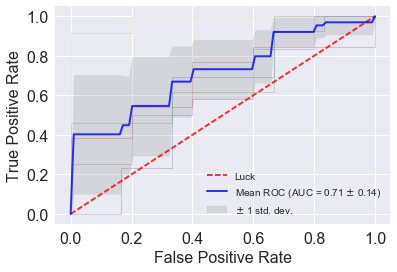

acc 0.676952184383, sens 0.69358974359, spec 0.646666666667


In [25]:
# Grid search for best parameters
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
# from sklearn.model_selection import KFold
# from sklearn.model_selection import StratifiedKFold
from sklearn.cross_validation import StratifiedKFold
from sklearn import svm
import math
from sklearn import linear_model
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import average_precision_score
from sklearn.model_selection import LeaveOneOut

from sklearn.preprocessing import label_binarize

from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle


# Binarize the output
# y = label_binarize(labels, classes=[1, 2])
# n_classes = 2

y = np.ravel(labels-1)
total_acc = 0
total_spec = 0
total_sens = 0

# total_sens_1 = 0
# total_sens_2 = 0
# total_sens_3 = 0
# total_spec_1 = 0
# total_spec_2 = 0
# total_spec_3 = 0

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
x = 0

total_importance = 0
total_auc = 0
total_std = 0
arr = []
total_acc = 0
total_sens = 0
total_spec = 0
    
# for x in range(100):
n_splits=5
kf = StratifiedKFold(labels,n_folds=n_splits, random_state=None, shuffle=False)

for train_index, test_index in kf:
    X_train, X_test = np.array(X.iloc[train_index]), np.array(X.iloc[test_index])
    y_train, y_test = y[train_index], y[test_index]


    unique, counts = np.unique(y_train, return_counts=True)
#         print(zip(unique, counts))

    unique, counts = np.unique(y_test, return_counts=True)
#         print(zip(unique, counts))

    C_range = 10. ** np.arange(-3, 8)
    gamma_range = 10. ** np.arange(-5, 5)

#     tuned_parameters = [{'C': C_range, 'gamma':gamma_range, 'kernel':['linear','poly','rbf','sigmoid'],
#                          'degree':[1,2,3,4,5]}]

#     tuned_parameters = [{'C': [0.00001,0.00005,0.0001,0.0005,0.001,0.005,0.05,0.01,0.1,0.5,1,5,10,1e2,1e4],
#                             'kernel':['linear','poly','rbf','sigmoid']}]

#     tuned_parameters = [{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150], 
#                          'min_samples_split': [2,4,8]}]

    tuned_parameters = [{'C': C_range}]

#     clf = GridSearchCV(RandomForestClassifier(class_weight='balanced', n_jobs=-1), tuned_parameters, cv=3, scoring='roc_auc')
    #     clf = GridSearchCV(LinearSVC(penalty='l2', loss='squared_hinge', class_weight='balanced'),tuned_parameters, cv=3)
#     clf = GridSearchCV(SVC(class_weight='balanced',probability=True),tuned_parameters, cv=3, scoring='accuracy')
    clf = GridSearchCV( linear_model.LogisticRegression(penalty='l2', class_weight='balanced', n_jobs=-1), tuned_parameters, cv=3, scoring='roc_auc')

#     np.random.shuffle(y_train)

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    probas_ = clf.fit(X_train, y_train).predict_proba(X_test)

    cm = confusion_matrix(y_test, y_pred)
#         print(cm)
    acc = accuracy_score(y_test, y_pred)
#         print(acc)
    tn, fp, fn, tp = cm.ravel()
        
    sens  = float(tp) / (float(tp)+float(fn))
    spec  = float(tn) / (float(tn)+float(fp))
    
        
    
        
#         print("Best parameters set found on development set:")
#         print()
#         print(clf.best_params_)

    #     # Feature importances
    #     importances = clf.best_estimator_.feature_importances_
    #     total_importance = total_importance + importances

    #     std = np.std([tree.feature_importances_ for tree in clf.best_estimator_.estimators_],
    #              axis=0)
    #     indices = np.argsort(importances)[::-1]

        # Print the feature ranking
    #     print("Feature ranking:")

    #     for f in range(X.shape[1]):
    #         print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

        # Plot the feature importances of the forest
    #     plt.figure()
    #     plt.title("Feature importances")
    #     plt.bar(range(X.shape[1]), importances[indices],
    #            color="r", yerr=std[indices], align="center")
    #     plt.xticks(range(X.shape[1]), indices)
    #     plt.xlim([-1, X.shape[1]])
    #     plt.show()


        # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3)#,
             #label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1

    total_acc = total_acc + acc
    total_sens = total_sens + sens
    total_spec = total_spec + spec

    # print("acc {}, sens_1 {}, sens_2 {}, sens_3 {}, spec_1 {}, spec_2 {}, spec_3 {}".format(total_acc/n_splits, total_sens_1/n_splits, total_sens_2/n_splits, total_sens_3/n_splits, total_spec_1/n_splits, total_spec_2/n_splits, total_spec_3/n_splits))

# fig = plt.figure(figsize=(12, 7), dpi=1000)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Luck', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)

plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc="lower right")

plt.show()


#     arr.append(mean_auc)
#     print(x)
#     x = x + 1
# print(total_auc/x)
# print(total_std/x)
# print(total_acc/n_splits, total_sens/n_splits, total_spec/n_splits)
print("acc {}, sens {}, spec {}".format(total_acc/n_splits, total_sens/n_splits, total_spec/n_splits))

In [26]:
# print(np.mean(arr))
# print(np.std(arr))

In [27]:
# print(total_auc/x)
# print(total_std/x)


In [28]:
# total_importance
# indices = np.argsort(total_importance)[::-1]
# print(indices)
# # NUSDAST_SZ_NC.columns[indices]
# NUSDAST_SZ_NC[[u'PreCG.L_CT',
#        u'SFGdor.L_CT', u'ORBsup.L_CT', u'MFG.L_CT', u'ORBmid.L_CT',
#        u'IFGoperc.L_CT', u'IFGtriang.L_CT', u'ORBinf.L_CT', u'ROL.L_CT',
#        u'SMA.L_CT', u'OLF.L_CT', u'SFGmed.L_CT', u'ORBsupmed.L_CT',
#        u'REC.L_CT', u'INS.L_CT', u'ACG.L_CT', u'DCG.L_CT', u'PCG.L_CT',
#        u'PHG.L_CT', u'CAL.L_CT', u'CUN.L_CT', u'LING.L_CT', u'SOG.L_CT',
#        u'MOG.L_CT', u'IOG.L_CT', u'FFG.L_CT', u'PoCG.L_CT', u'SPG.L_CT',
#        u'IPL.L_CT', u'SMG.L_CT', u'ANG.L_CT', u'PCUN.L_CT', u'PCL.L_CT',
#        u'HES.L_CT', u'STG.L_CT', u'TPOsup.L_CT', u'MTG.L_CT', u'TPOmid.L_CT',
#        u'ITG.L_CT', u'Mean.L_CT', u'PreCG.R_CT', u'SFGdor.R_CT',
#        u'ORBsup.R_CT', u'MFG.R_CT', u'ORBmid.R_CT', u'IFGoperc.R_CT',
#        u'IFGtriang.R_CT', u'ORBinf.R_CT', u'ROL.R_CT', u'SMA.R_CT',
#        u'OLF.R_CT', u'SFGmed.R_CT', u'ORBsupmed.R_CT', u'REC.R_CT',
#        u'INS.R_CT', u'ACG.R_CT', u'DCG.R_CT', u'PCG.R_CT', u'PHG.R_CT',
#        u'CAL.R_CT', u'CUN.R_CT', u'LING.R_CT', u'SOG.R_CT', u'MOG.R_CT',
#        u'IOG.R_CT', u'FFG.R_CT', u'PoCG.R_CT', u'SPG.R_CT', u'IPL.R_CT',
#        u'SMG.R_CT', u'ANG.R_CT', u'PCUN.R_CT', u'PCL.R_CT', u'HES.R_CT',
#        u'STG.R_CT', u'TPOsup.R_CT', u'MTG.R_CT', u'TPOmid.R_CT', u'ITG.R_CT',
#        u'Mean.R_CT', u'age', u'sex']].columns[indices]

In [29]:
# total_importance

# np.sum(total_importance)

In [32]:
fig = plt.figure(figsize=(10, 7), dpi=1000)
plt.plot([0, 1], [0, 1], linestyle='--', lw=5, color='r',alpha=.8)
#          label='Luck', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',lw=5, label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc), alpha=.8)
#          label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
#          lw=5, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2)#,
#                  label=r'$\pm$ 1 std. dev.')


plt.xlim([-0.05, 1])
plt.ylim([-0.05, 1])
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
# plt.xlabel('False Positive Rate', fontsize=20)
# plt.ylabel('True Positive Rate', fontsize=20)
# plt.title('Receiver operating characteristic example', fontsize=16)
plt.legend(loc="lower right", fontsize=25)
plt.show()

# fig.savefig('RF_HCvSZ_g2_2.svg', format='svg', dpi=1000)
# fig.savefig('SVM_HCvSZ.eps', format='eps', dpi=1000)

In [33]:
# clf.best_estimator_.estimators_

In [34]:
# clf.estimators_

In [35]:
# importances.shape
# X.columns

In [36]:
# X.columns[importances>0.015]

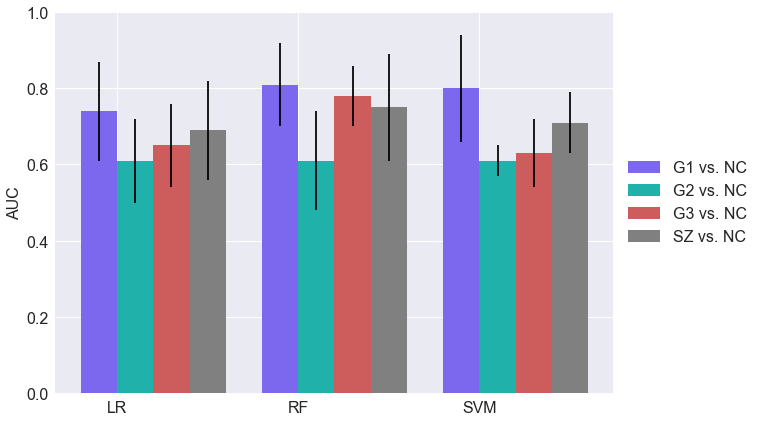

In [872]:
import numpy as np
import matplotlib.pyplot as plt

#'#7b68ee', '#20b2aa', '#cd5c5c','#d02090'
plt.figure(figsize=(12, 7), dpi=100)

N = 3
grp1vNC = (0.74, 0.81, 0.8)
grp1vNC_std = (0.13, 0.11, 0.14)

ind = np.arange(N)  # the x locations for the groups
width = 0.2       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, grp1vNC, width, color='#7b68ee', yerr=grp1vNC_std)

grp2vNC = (0.61, 0.61, 0.61)
grp2vNC_std = (0.11, 0.13, 0.04)
rects2 = ax.bar(ind + width, grp2vNC, width, color='#20b2aa', yerr=grp2vNC_std)

grp3vNC = (0.65, 0.78, 0.63)
grp3vNC_std = (0.11, 0.08 , 0.09)
rects3 = ax.bar(ind + width + width, grp3vNC, width, color='#cd5c5c', yerr=grp3vNC_std)

grp4vNC = (0.69, 0.75, 0.71)
grp4vNC_std = (0.13, 0.14, 0.08)
rects4 = ax.bar(ind + width + width + width, grp4vNC, width, color='gray', yerr=grp4vNC_std)

# add some text for labels, title and axes ticks
ax.set_ylabel('AUC',fontsize=16)
# ax.set_title('Scores by group and gender')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('LR', 'RF', 'SVM'),fontsize=16)

ax.legend((rects1[0], rects2[0], rects3[0], rects4[0]), ('G1 vs. NC', 'G2 vs. NC','G3 vs. NC','SZ vs. NC'),fontsize=16,loc='center left', bbox_to_anchor=(1, 0.5))
# ax.set_ylim([0, 1])

# Put a legend to the right of the current axis
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(16)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7
plt.rcParams["figure.figsize"] = fig_size

plt.ylim([0, 1])
plt.show()

fig.savefig('summary.svg', format='svg', dpi=1000)

In [ ]:
ax = sns.boxplot(x="day", y="total_bill", data=tips)

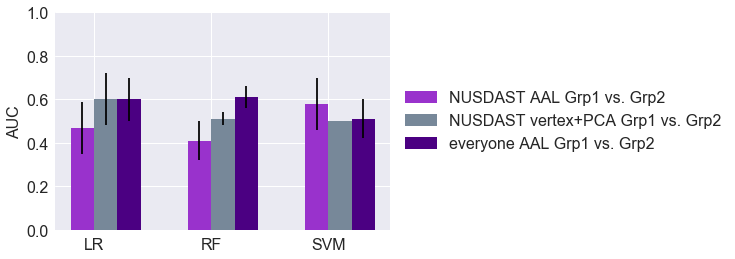

In [7]:
import numpy as np
import matplotlib.pyplot as plt

N = 3
grp1vNC = (0.47, 0.41 , 0.58)
grp1vNC_std = (0.12, 0.09, 0.12)

ind = np.arange(N)  # the x locations for the groups
width = 0.2

# the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, grp1vNC, width, color='#9932CC', yerr=grp1vNC_std)

grp2vNC = (0.60, 0.51 , 0.50)
grp2vNC_std = (0.12, 0.03, 0)
rects2 = ax.bar(ind + width, grp2vNC, width, color='#778899', yerr=grp2vNC_std)

grp3vNC = (0.60, 0.61 , 0.51)
grp3vNC_std = (0.10, 0.05, 0.09)
rects3 = ax.bar(ind + width + width, grp3vNC, width, color='#4B0082', yerr=grp3vNC_std)

# grp4vNC = (0.57, 0.57, )
# grp4vNC_std = (0.07, 0.08, )
# rects4 = ax.bar(ind + width + width + width, grp4vNC, width, color='#696969', yerr=grp4vNC_std)

# grp5vNC = (0.61)
# grp5vNC_std = (0.16)
# rects5 = ax.bar(ind + width + width + width + width, grp5vNC, width, color='c', yerr=grp5vNC_std)

# grp6vNC = (0.52)
# grp6vNC_std = (0.10)
# rects6 = ax.bar(ind + width + width + width + width + width, grp6vNC, width, color='r', yerr=grp6vNC_std)

# add some text for labels, title and axes ticks
ax.set_ylabel('AUC',fontsize=16)
# ax.set_title('Scores by group and gender')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('LR', 'RF', 'SVM'))

# ax.legend((rects1[0]), ('Grp1 vs. Grp2'))

ax.legend((rects1[0],rects2[0],rects3[0]), ('NUSDAST AAL Grp1 vs. Grp2','NUSDAST vertex+PCA Grp1 vs. Grp2','everyone AAL Grp1 vs. Grp2','everyone vertex+PCA Grp1 vs. Grp2'),fontsize=16,loc='center left', bbox_to_anchor=(1, 0.5))

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(16)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7
plt.rcParams["figure.figsize"] = fig_size

plt.ylim([0, 1])

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 3
grp1vNC = (0.73, 0.79 , 0.66)
grp1vNC_std = (0.22, 0.09 , 0.26)

ind = np.arange(N)  # the x locations for the groups
width = 0.3

# the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, grp1vNC, width, color='m', yerr=grp1vNC_std)

grp2vNC = (0.42, 0.64  , 0.50)
grp2vNC_std = (0.08, 0.13  , 0.05)
rects2 = ax.bar(ind + width, grp2vNC, width, color='y', yerr=grp2vNC_std)

grp3vNC = (0.73, , 0.52)
grp3vNC_std = (0.14,   , 0.20)
rects3 = ax.bar(ind + width + width, grp3vNC, width, color='b', yerr=grp3vNC_std)

# grp4vNC = (0.63)
# grp4vNC_std = (0.28)
# rects4 = ax.bar(ind + width + width + width, grp4vNC, width, color='m', yerr=grp4vNC_std)

# grp5vNC = (0.61)
# grp5vNC_std = (0.16)
# rects5 = ax.bar(ind + width + width + width + width, grp5vNC, width, color='c', yerr=grp5vNC_std)

# grp6vNC = (0.52)
# grp6vNC_std = (0.10)
# rects6 = ax.bar(ind + width + width + width + width + width, grp6vNC, width, color='r', yerr=grp6vNC_std)

# add some text for labels, title and axes ticks
ax.set_ylabel('AUC')
# ax.set_title('Scores by group and gender')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('LR', 'RF', 'SVM'))

ax.legend((rects1[0],rects2[0],rects3[0]), ('Grp1 vs. Grp2', 'Grp1 vs. Grp3', 'Grp2 vs. Grp3'))

plt.show()

In [2247]:
sns.set(font_scale=1)
# y_train.shape

In [1001]:
# y_train[test_index]

In [861]:
# test_index

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 38, 39, 42, 43])

In [ ]:
# # Grid search for best parameters
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVR
# from sklearn.multiclass import OneVsRestClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import classification_report
# from sklearn.decomposition import PCA
# from sklearn.svm import LinearSVC
# from sklearn.svm import SVC

# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix
# # from sklearn.model_selection import KFold
# # from sklearn.model_selection import StratifiedKFold
# from sklearn.cross_validation import StratifiedKFold
# from sklearn import svm
# import math
# from sklearn import linear_model
# from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
# from sklearn.metrics import average_precision_score
# from sklearn.model_selection import LeaveOneOut

# from sklearn.preprocessing import label_binarize

# from scipy import interp
# import matplotlib.pyplot as plt
# from itertools import cycle


# y = np.ravel(labels-1)
# total_acc = 0
# total_spec = 0
# total_sens = 0

# tprs = []
# aucs = []
# mean_fpr = np.linspace(0, 1, 100)

# i = 0
# x = 0

# total_importance = 0
# total_auc = 0
# total_std = 0
# arr = []
# arr2 = []
# total_acc = 0
# total_sens = 0
# total_spec = 0
    
# for x in range(1000):
#     n_splits=5
#     kf = StratifiedKFold(labels,n_folds=n_splits, random_state=None, shuffle=False)

#     for train_index, test_index in kf:
#         X_train, X_test = np.array(X.iloc[train_index]), np.array(X.iloc[test_index])
#         y_train, y_test = y[train_index], y[test_index]


#         unique, counts = np.unique(y_train, return_counts=True)

#         unique, counts = np.unique(y_test, return_counts=True)

#         C_range = 10. ** np.arange(-3, 8)
#         gamma_range = 10. ** np.arange(-5, 5)

#         tuned_parameters = [{'C': C_range, 'gamma':gamma_range, 'kernel':['linear','poly','rbf','sigmoid'],
#                          'degree':[1,2,3,4,5]}]

# #     tuned_parameters = [{'C': [0.00001,0.00005,0.0001,0.0005,0.001,0.005,0.05,0.01,0.1,0.5,1,5,10,1e2,1e4],
# #                             'kernel':['linear','poly','rbf','sigmoid']}]

# #     tuned_parameters = [{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150], 
# #                          'min_samples_split': [2,4,8]}]

# #         tuned_parameters = [{'C': C_range}]

# #     clf = GridSearchCV(RandomForestClassifier(class_weight='balanced', n_jobs=-1), tuned_parameters, cv=3, scoring='roc_auc')
#     #     clf = GridSearchCV(LinearSVC(penalty='l2', loss='squared_hinge', class_weight='balanced'),tuned_parameters, cv=3)
#         clf = GridSearchCV(SVC(class_weight='balanced',probability=True),tuned_parameters, cv=3, scoring='accuracy')
# #         clf = GridSearchCV( linear_model.LogisticRegression(penalty='l2', class_weight='balanced', n_jobs=-1), tuned_parameters, cv=3, scoring='roc_auc')

#         np.random.shuffle(y_train)

#         clf.fit(X_train, y_train)

#         y_pred = clf.predict(X_test)
#         probas_ = clf.fit(X_train, y_train).predict_proba(X_test)

#         cm = confusion_matrix(y_test, y_pred)
#         acc = accuracy_score(y_test, y_pred)
#         tn, fp, fn, tp = cm.ravel()


#             # Compute ROC curve and area the curve
#         fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
#         tprs.append(interp(mean_fpr, fpr, tpr))
#         tprs[-1][0] = 0.0
#         roc_auc = auc(fpr, tpr)
# #     aucs.append(roc_auc)
# #     plt.plot(fpr, tpr, lw=1, alpha=0.3)#,
#              #label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

#     # print("acc {}, sens_1 {}, sens_2 {}, sens_3 {}, spec_1 {}, spec_2 {}, spec_3 {}".format(total_acc/n_splits, total_sens_1/n_splits, total_sens_2/n_splits, total_sens_3/n_splits, total_spec_1/n_splits, total_spec_2/n_splits, total_spec_3/n_splits))

# # fig = plt.figure(figsize=(12, 7), dpi=1000)
# # plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Luck', alpha=.8)

#         mean_tpr = np.mean(tprs, axis=0)
#         mean_tpr[-1] = 1.0
#         mean_auc = auc(mean_fpr, mean_tpr)
#         std_auc = np.std(aucs)
# # plt.plot(mean_fpr, mean_tpr, color='b',
# #          label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
# #          lw=2, alpha=.8)

# # std_tpr = np.std(tprs, axis=0)
# # tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
# # tprs_lower = np.maximum(mean_tpr - std_tpr, 0)

# # plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
# #                  label=r'$\pm$ 1 std. dev.')

# # plt.xlim([-0.05, 1.05])
# # plt.ylim([-0.05, 1.05])
# # plt.xlabel('False Positive Rate', fontsize=16)
# # plt.ylabel('True Positive Rate', fontsize=16)
# # plt.xticks(fontsize=16)
# # plt.yticks(fontsize=16)
# # plt.legend(loc="lower right")

# # plt.show()


#     arr.append(mean_auc)
#     arr2.append(std_auc)
# #     print(x)
# #     x = x + 1
# # print(total_auc/x)
# # print(total_std/x)
# # print(total_acc/n_splits, total_sens/n_splits, total_spec/n_splits)
# print(arr)

In [ ]:
# np.mean(arr)

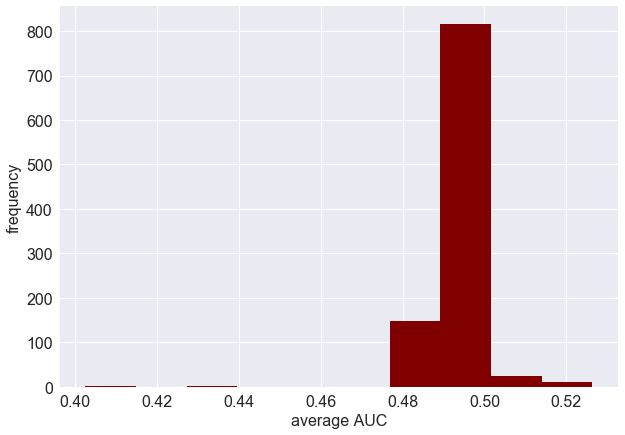

In [110]:
# import matplotlib.pyplot as plt

# fig = plt.subplots(figsize=(10, 7))
# plt.hist(arr, align='left',color='maroon')

# axes = plt.gca()
# # axes.set_xlim([0,1])
# # axes.set_ylim([0,270])
# for label in (axes.get_xticklabels() + axes.get_yticklabels()):
#     label.set_fontsize(16)
# plt.xlabel('average AUC', fontsize=16)
# plt.ylabel('frequency', fontsize=16)
# plt.show()
# # fig.savefig('stab.eps', format='eps', dpi=1000)

In [37]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVR
# from sklearn.multiclass import OneVsRestClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import classification_report
# from sklearn.decomposition import PCA
# from sklearn.svm import LinearSVC
# from sklearn.svm import SVC

# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix
# # from sklearn.model_selection import KFold
# # from sklearn.model_selection import StratifiedKFold
# from sklearn.cross_validation import StratifiedKFold
# from sklearn import svm
# import math
# from sklearn import linear_model
# from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
# from sklearn.metrics import average_precision_score
# from sklearn.model_selection import LeaveOneOut

# from sklearn.preprocessing import label_binarize

# from scipy import interp
# import matplotlib.pyplot as plt
# from itertools import cycle

# # Binarize the output
# y = label_binarize(labels, classes=[1,2,3])
# n_classes = y.shape[1]

# # shuffle and split training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=10, stratify=y)
# # Learn to predict each class against the other
# # classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True, random_state=0))
# classifier = OneVsRestClassifier(linear_model.LogisticRegression(penalty='l1', class_weight='balanced', n_jobs=-1))
# y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# # Compute ROC curve and ROC area for each class
# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# for i in range(n_classes):
#     fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])

# # Compute micro-average ROC curve and ROC area
# fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# plt.figure()
# lw = 2
# cl = 0
# plt.plot(fpr[cl], tpr[cl], color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[cl])
# plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic example')
# plt.legend(loc="lower right")
# plt.show()

In [38]:
# # Compute macro-average ROC curve and ROC area

# # First aggregate all false positive rates
# all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# # Then interpolate all ROC curves at this points
# mean_tpr = np.zeros_like(all_fpr)
# for i in range(n_classes):
#     mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# # Finally average it and compute AUC
# mean_tpr /= n_classes

# fpr["macro"] = all_fpr
# tpr["macro"] = mean_tpr
# roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# # Plot all ROC curves
# plt.figure()
# plt.plot(fpr["micro"], tpr["micro"],
#          label='micro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc["micro"]),
#          color='deeppink', linestyle=':', linewidth=4)

# plt.plot(fpr["macro"], tpr["macro"],
#          label='macro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc["macro"]),
#          color='navy', linestyle=':', linewidth=4)

# colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
# for i, color in zip(range(n_classes), colors):
#     plt.plot(fpr[i], tpr[i], color=color, lw=lw,
#              label='ROC curve of class {0} (area = {1:0.2f})'
#              ''.format(i, roc_auc[i]))

# plt.plot([0, 1], [0, 1], 'k--', lw=lw)
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Some extension of Receiver operating characteristic to multi-class')
# plt.legend(loc="lower right")
# plt.show()

In [39]:
# from sklearn.preprocessing import label_binarize
# y = label_binarize(labels, classes=[1, 2, 3])

In [40]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.multiclass import OneVsRestClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.decomposition import PCA
# from sklearn.svm import LinearSVC
# from sklearn.svm import SVC

# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import confusion_matrix
# from sklearn.cross_validation import StratifiedKFold
# from sklearn import svm
# import math
# from sklearn import linear_model
# from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
# from sklearn.metrics import average_precision_score

# from sklearn.preprocessing import label_binarize

# from scipy import interp
# import matplotlib.pyplot as plt
# from itertools import cycle

# from sklearn.multiclass import OneVsRestClassifier

# # Binarize the output
# y = label_binarize(y, classes=[0, 1, 2])
# n_classes = y.shape[1]

In [ ]:
NUSDAST_SZ_NC[[u'PreCG.L_CT',
       u'SFGdor.L_CT', u'ORBsup.L_CT', u'MFG.L_CT', u'ORBmid.L_CT',
       u'IFGoperc.L_CT', u'IFGtriang.L_CT', u'ORBinf.L_CT', u'ROL.L_CT',
       u'SMA.L_CT', u'OLF.L_CT', u'SFGmed.L_CT', u'ORBsupmed.L_CT',
       u'REC.L_CT', u'INS.L_CT', u'ACG.L_CT', u'DCG.L_CT', u'PCG.L_CT',
       u'PHG.L_CT', u'CAL.L_CT', u'CUN.L_CT', u'LING.L_CT', u'SOG.L_CT',
       u'MOG.L_CT', u'IOG.L_CT', u'FFG.L_CT', u'PoCG.L_CT', u'SPG.L_CT',
       u'IPL.L_CT', u'SMG.L_CT', u'ANG.L_CT', u'PCUN.L_CT', u'PCL.L_CT',
       u'HES.L_CT', u'STG.L_CT', u'TPOsup.L_CT', u'MTG.L_CT', u'TPOmid.L_CT',
       u'ITG.L_CT', u'Mean.L_CT', u'PreCG.R_CT', u'SFGdor.R_CT',
       u'ORBsup.R_CT', u'MFG.R_CT', u'ORBmid.R_CT', u'IFGoperc.R_CT',
       u'IFGtriang.R_CT', u'ORBinf.R_CT', u'ROL.R_CT', u'SMA.R_CT',
       u'OLF.R_CT', u'SFGmed.R_CT', u'ORBsupmed.R_CT', u'REC.R_CT',
       u'INS.R_CT', u'ACG.R_CT', u'DCG.R_CT', u'PCG.R_CT', u'PHG.R_CT',
       u'CAL.R_CT', u'CUN.R_CT', u'LING.R_CT', u'SOG.R_CT', u'MOG.R_CT',
       u'IOG.R_CT', u'FFG.R_CT', u'PoCG.R_CT', u'SPG.R_CT', u'IPL.R_CT',
       u'SMG.R_CT', u'ANG.R_CT', u'PCUN.R_CT', u'PCL.R_CT', u'HES.R_CT',
       u'STG.R_CT', u'TPOsup.R_CT', u'MTG.R_CT', u'TPOmid.R_CT', u'ITG.R_CT',
       u'Mean.R_CT', u'age', u'sex']] = NUSDAST_SZ_NC[[u'PreCG.L_CT',
       u'SFGdor.L_CT', u'ORBsup.L_CT', u'MFG.L_CT', u'ORBmid.L_CT',
       u'IFGoperc.L_CT', u'IFGtriang.L_CT', u'ORBinf.L_CT', u'ROL.L_CT',
       u'SMA.L_CT', u'OLF.L_CT', u'SFGmed.L_CT', u'ORBsupmed.L_CT',
       u'REC.L_CT', u'INS.L_CT', u'ACG.L_CT', u'DCG.L_CT', u'PCG.L_CT',
       u'PHG.L_CT', u'CAL.L_CT', u'CUN.L_CT', u'LING.L_CT', u'SOG.L_CT',
       u'MOG.L_CT', u'IOG.L_CT', u'FFG.L_CT', u'PoCG.L_CT', u'SPG.L_CT',
       u'IPL.L_CT', u'SMG.L_CT', u'ANG.L_CT', u'PCUN.L_CT', u'PCL.L_CT',
       u'HES.L_CT', u'STG.L_CT', u'TPOsup.L_CT', u'MTG.L_CT', u'TPOmid.L_CT',
       u'ITG.L_CT', u'Mean.L_CT', u'PreCG.R_CT', u'SFGdor.R_CT',
       u'ORBsup.R_CT', u'MFG.R_CT', u'ORBmid.R_CT', u'IFGoperc.R_CT',
       u'IFGtriang.R_CT', u'ORBinf.R_CT', u'ROL.R_CT', u'SMA.R_CT',
       u'OLF.R_CT', u'SFGmed.R_CT', u'ORBsupmed.R_CT', u'REC.R_CT',
       u'INS.R_CT', u'ACG.R_CT', u'DCG.R_CT', u'PCG.R_CT', u'PHG.R_CT',
       u'CAL.R_CT', u'CUN.R_CT', u'LING.R_CT', u'SOG.R_CT', u'MOG.R_CT',
       u'IOG.R_CT', u'FFG.R_CT', u'PoCG.R_CT', u'SPG.R_CT', u'IPL.R_CT',
       u'SMG.R_CT', u'ANG.R_CT', u'PCUN.R_CT', u'PCL.R_CT', u'HES.R_CT',
       u'STG.R_CT', u'TPOsup.R_CT', u'MTG.R_CT', u'TPOmid.R_CT', u'ITG.R_CT',
       u'Mean.R_CT', u'age', u'sex']].apply(zscore)

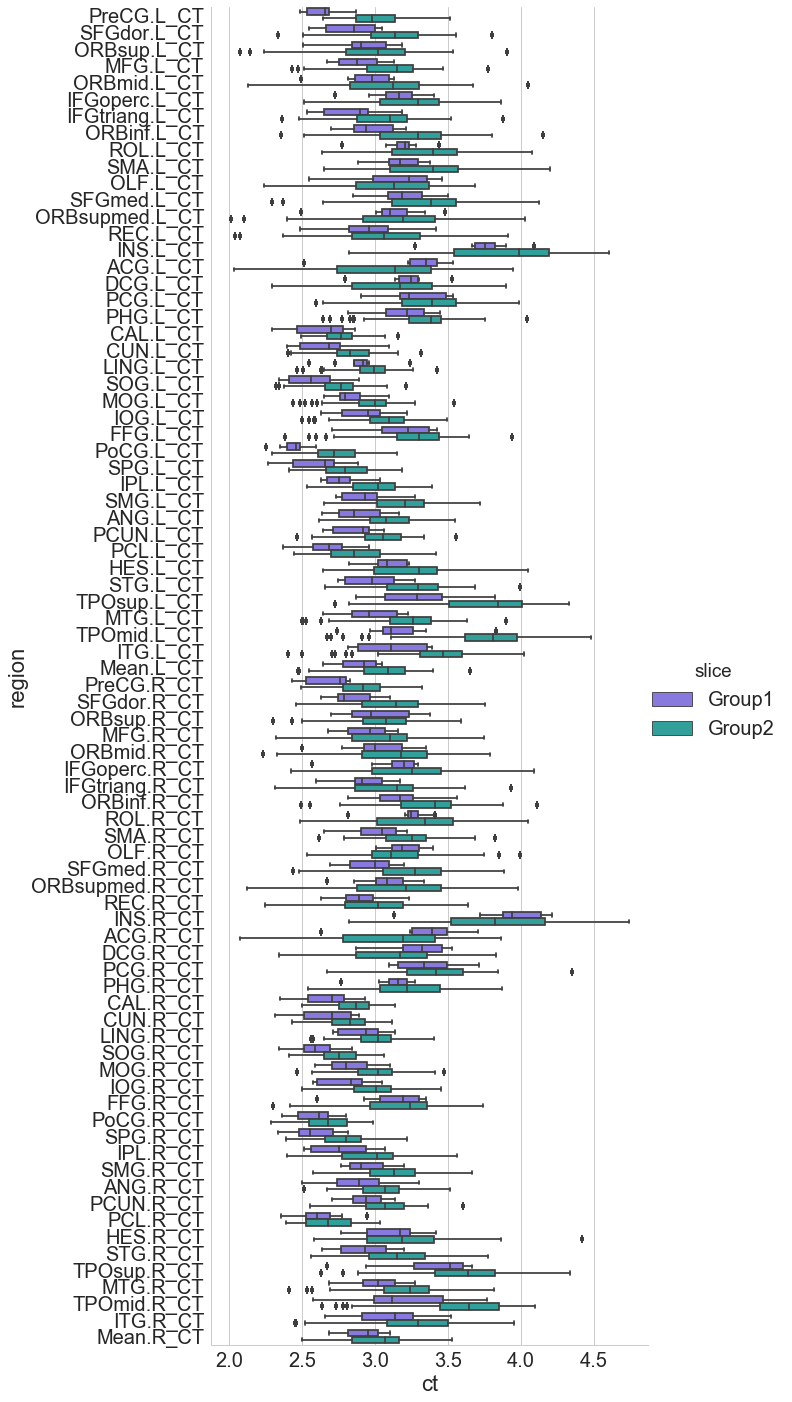

In [2164]:
sliced_dfs = {'Group1':NUSDAST_SZ_NC[NUSDAST_SZ_NC['dx']==1][['subjectid',
        u'PreCG.L_CT', u'SFGdor.L_CT', u'ORBsup.L_CT', u'MFG.L_CT', u'ORBmid.L_CT',
       u'IFGoperc.L_CT', u'IFGtriang.L_CT', u'ORBinf.L_CT', u'ROL.L_CT',
       u'SMA.L_CT', u'OLF.L_CT', u'SFGmed.L_CT', u'ORBsupmed.L_CT',
       u'REC.L_CT', u'INS.L_CT', u'ACG.L_CT', u'DCG.L_CT', u'PCG.L_CT',
       u'PHG.L_CT', u'CAL.L_CT', u'CUN.L_CT', u'LING.L_CT', u'SOG.L_CT',
       u'MOG.L_CT', u'IOG.L_CT', u'FFG.L_CT', u'PoCG.L_CT', u'SPG.L_CT',
       u'IPL.L_CT', u'SMG.L_CT', u'ANG.L_CT', u'PCUN.L_CT', u'PCL.L_CT',
       u'HES.L_CT', u'STG.L_CT', u'TPOsup.L_CT', u'MTG.L_CT', u'TPOmid.L_CT',
       u'ITG.L_CT', u'Mean.L_CT', u'PreCG.R_CT', u'SFGdor.R_CT',
       u'ORBsup.R_CT', u'MFG.R_CT', u'ORBmid.R_CT', u'IFGoperc.R_CT',
       u'IFGtriang.R_CT', u'ORBinf.R_CT', u'ROL.R_CT', u'SMA.R_CT',
       u'OLF.R_CT', u'SFGmed.R_CT', u'ORBsupmed.R_CT', u'REC.R_CT',
       u'INS.R_CT', u'ACG.R_CT', u'DCG.R_CT', u'PCG.R_CT', u'PHG.R_CT',
       u'CAL.R_CT', u'CUN.R_CT', u'LING.R_CT', u'SOG.R_CT', u'MOG.R_CT',
       u'IOG.R_CT', u'FFG.R_CT', u'PoCG.R_CT', u'SPG.R_CT', u'IPL.R_CT',
       u'SMG.R_CT', u'ANG.R_CT', u'PCUN.R_CT', u'PCL.R_CT', u'HES.R_CT',
       u'STG.R_CT', u'TPOsup.R_CT', u'MTG.R_CT', u'TPOmid.R_CT', u'ITG.R_CT',
       u'Mean.R_CT']],
              'Group2':NUSDAST_SZ_NC[NUSDAST_SZ_NC['dx']==2][['subjectid',
        u'PreCG.L_CT', u'SFGdor.L_CT', u'ORBsup.L_CT', u'MFG.L_CT', u'ORBmid.L_CT',
       u'IFGoperc.L_CT', u'IFGtriang.L_CT', u'ORBinf.L_CT', u'ROL.L_CT',
       u'SMA.L_CT', u'OLF.L_CT', u'SFGmed.L_CT', u'ORBsupmed.L_CT',
       u'REC.L_CT', u'INS.L_CT', u'ACG.L_CT', u'DCG.L_CT', u'PCG.L_CT',
       u'PHG.L_CT', u'CAL.L_CT', u'CUN.L_CT', u'LING.L_CT', u'SOG.L_CT',
       u'MOG.L_CT', u'IOG.L_CT', u'FFG.L_CT', u'PoCG.L_CT', u'SPG.L_CT',
       u'IPL.L_CT', u'SMG.L_CT', u'ANG.L_CT', u'PCUN.L_CT', u'PCL.L_CT',
       u'HES.L_CT', u'STG.L_CT', u'TPOsup.L_CT', u'MTG.L_CT', u'TPOmid.L_CT',
       u'ITG.L_CT', u'Mean.L_CT', u'PreCG.R_CT', u'SFGdor.R_CT',
       u'ORBsup.R_CT', u'MFG.R_CT', u'ORBmid.R_CT', u'IFGoperc.R_CT',
       u'IFGtriang.R_CT', u'ORBinf.R_CT', u'ROL.R_CT', u'SMA.R_CT',
       u'OLF.R_CT', u'SFGmed.R_CT', u'ORBsupmed.R_CT', u'REC.R_CT',
       u'INS.R_CT', u'ACG.R_CT', u'DCG.R_CT', u'PCG.R_CT', u'PHG.R_CT',
       u'CAL.R_CT', u'CUN.R_CT', u'LING.R_CT', u'SOG.R_CT', u'MOG.R_CT',
       u'IOG.R_CT', u'FFG.R_CT', u'PoCG.R_CT', u'SPG.R_CT', u'IPL.R_CT',
       u'SMG.R_CT', u'ANG.R_CT', u'PCUN.R_CT', u'PCL.R_CT', u'HES.R_CT',
       u'STG.R_CT', u'TPOsup.R_CT', u'MTG.R_CT', u'TPOmid.R_CT', u'ITG.R_CT',
       u'Mean.R_CT']]}#, 
#               'Group3':labeledCT[labeledCT['Group']==3][['subjectid',
#         u'48982', u'48992', u'42981', u'72971', u'72972', u'72936',u'9966', u'39813', u'72910',u'67913', u'47732', u'67916', u'67927', u'47735',u'67925', u'67914', u'67911',u'69118', u'69117', u'69123', u'42712', u'68604', u'68594', u'68595',u'68593', u'68603', u'69114',u'67911', u'47733', u'67915', u'67917', u'67916',u'26469', u'47732', u'6649']],
#              'Group4':labeledCT[labeledCT['Group']==4][['subjectid',
#         u'48982', u'48992', u'42981', u'72971', u'72972', u'72936',u'9966', u'39813', u'72910',u'67913', u'47732', u'67916', u'67927', u'47735',u'67925', u'67914', u'67911',u'69118', u'69117', u'69123', u'42712', u'68604', u'68594', u'68595',u'68593', u'68603', u'69114',u'67911', u'47733', u'67915', u'67917', u'67916',u'26469', u'47732', u'6649']]}
plot_df = pd.DataFrame()
for key in sliced_dfs.keys():
    sliced_df = sliced_dfs[key]
    for col in sliced_df.columns:
        sliced_df_melt = pd.melt(sliced_df, id_vars=['subjectid'],value_vars=list(sliced_df.columns).remove('subjectid'),
                                 var_name='region',value_name='ct')
        sliced_df_melt['slice'] = np.tile(key,len(sliced_df_melt))
        
        plot_df = plot_df.append(sliced_df_melt)
        
sns.set(font_scale=2)
with sns.axes_style("whitegrid"):
    g = sns.factorplot(x='ct',y='region',hue='slice', palette=['#7b68ee', '#20b2aa', '#cd5c5c','#d02090'], data=plot_df, kind='box',size=20,ci=None,aspect=0.5,orient="h")
    
plt.show()

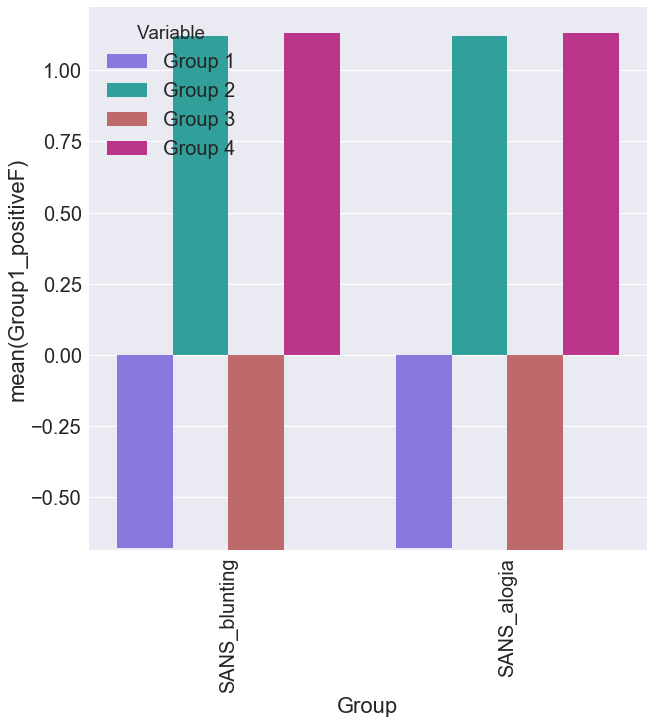

In [840]:
np.mean(X[labels==1][0])
# labels
import matplotlib.pyplot as pyplot
df = pd.DataFrame({
    'Group': ['SANS_blunting','SANS_alogia'], #'SANS_apathy','SANS_asociality', 'SANS_attention','SAPS_hallucinations', 'SAPS_delusions','SAPS_BizBeh', 'SAPS_posForTh'],
    'Group 1': np.mean(X[labels==1][2]),
    'Group 2': np.mean(X[labels==2][2]),
    'Group 3': np.mean(X[labels==1][3]),
    'Group 4': np.mean(X[labels==2][3])
})
fig, ax1 = pyplot.subplots(figsize=(10, 10))
tidy = (
    df.set_index('Group')
      .stack()  # un-pivots the data 
      .reset_index()  # moves all data out of the index
      .rename(columns={'level_1': 'Variable', 0: 'Group1_positiveF'})
)
snsplot = sns.barplot(x='Group', y='Group1_positiveF', hue='Variable', palette=['#7b68ee', '#20b2aa', '#cd5c5c','#d02090'], data=tidy, ax=ax1)
for item in snsplot.get_xticklabels():
    item.set_rotation(90)
sns.despine(fig)
plt.show()